# <center> LAB 2: Linear Classification: Logistic Regression<br> <small>Réda DEHAK<br> December 9th, 2020</small> </center>

The goal of this lab is :
    - Test the logistic regression on classification problems
    - Evaluate performances statistics.


In [1]:
%pylab
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Using matplotlib backend: <object object at 0x119a4d2b0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Part 1: Logistic Regression 
### Import Data

We will use the Wine dataset from UCI. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of thirteen constituents found in each of the three types of wines.

# Loading and Plotting Data
 
First, we will use only two features from the data set: alcohol and ash (We can plot the solution in 2D space). The labels are supplied as an array of data with values from 1 to 3, but at first, we want a simple binary regression problem with a yes or no answer.  

We filter the data set, reducing it to only include wines with labels 1 or 2.  

In [2]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')

reduced = data[data['class'] <= 2]
X = reduced[['alcohol', 'ash']].to_numpy()
y = label_binarize(reduced['class'].to_numpy(), classes=[1, 2])[:,0]

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
print(data)

     class  alcohol  malic_acid   ash  alcalinity  magnesium  total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   
..     ...      ...         ...   ...         ...        ...            ...   
173      3    13.71        5.65  2.45        20.5         95           1.68   
174      3    13.40        3.91  2.48        23.0        102           1.80   
175      3    13.27        4.28  2.26        20.0        120           1.59   
176      3    13.17        2.59  2.37        20.0        120           1.65   
177      3    14.13        4.10  2.74        24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [4]:
# split data into train and validation set
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('train:', len(Xtrain), 'test:', len(Xtest))

train: 97 test: 33


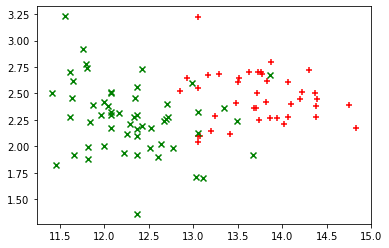

In [5]:
MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(Xtrain, ytrain)

We can see that we can plot line that could divide the two colored points with a small amount of error.

# Logistic Regression

To implement logistic regression, we need to define the cost function $J(\theta)$, and compute the partial derivatives of $J(\theta)$. As we have seen previously:

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i}))
$$


$$
\frac{d L L K(X)}{d W}=\sum_{i=1}^{N} x_{i}\left(y_{i}-f_{W}\left(x_{i}\right)\right)
$$

where $f_\theta(x)$ is the logistic function

$$
f_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$


- Compute the partiel derivatives of $J(\theta)$ and write the two functions:
    - cost(theta, X, y) which compute the value of $J(\theta)$
    - gradient(theta, X, y) which compute the value of the gradient of $J(\theta)$

In [6]:
def sigmoid(theta, X): # function Fø(x)
    return 1 / ( 1 + np.exp(-X@ theta) )

def cost(theta, X, y): # likeleyhood # theta is a vector so no need to reshape
    N=X.shape[0]
    fx=sigmoid(theta,X)
    return -(1/N) *np.sum( y *np.log(fx) + (1 - y )* log(1 -fx))
    # Or this one
    #return -np.mean( y *np.log(fx) + (1 - y )* log(1 -fx))

def gradient(theta, X, y): # y is a scalar 
    N=X.shape[0]
    return -1/N* (y-sigmoid(theta,X)).T @ X
    # or
    # 1/N* (sigmoid(theta,X)-y).T @ X

- Using the function scipy.optimize.fmin_tnc which performs a gradient descent algorithm, write a function Train(x, y) which compute $\theta$ that minimize $J(\theta)$

In [37]:
from scipy.optimize import fmin_tnc  

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
    print(result)
    return result[0]


- compute the value of the best $\theta$

In [38]:
W=train(Xtrain, ytrain)
print(W)

(array([60.6934037, -4.1078369, -2.9324095]), 78, 1)
[60.6934037 -4.1078369 -2.9324095]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   4.51418817E-01
    1    3  6.879398176442292E-01   9.68924523E-04
tnc: fscale = 32.1259
    2    5  6.773442725320433E-01   6.87490810E-01
tnc: fscale = 1.20605
    3    7  6.691298688169969E-01   1.14252725E-03
tnc: fscale = 29.5847
    4    9  6.690962822600788E-01   1.73844618E-03
tnc: stepmx = 1000
    5   11  4.652071950856019E-01   1.21825199E-03
    6   13  4.570148132679090E-01   5.12879552E-01
tnc: fscale = 1.39634
    7   15  4.501676467232790E-01   3.21363604E-04
tnc: fscale = 55.783
    8   17  4.501525045432034E-01   8.26722284E-04
    9   21  2.483858956492052E-01   1.05699302E-02
   10   26  2.326180321563049E-01   1.93114621E-03
   11   28  2.325476568187944E-01   3.95935235E-04
   12   30  2.324287858288186E-01   1.07930045E-03
   13   32  2.321942211545868E-01   5.95163167E-04
   14   34  2.279952586437425E-01   1.06675766E-03
   15   36  2.277306827065085E-01   1.91942676E-03
   16   38  2.2

- Plot the boundary and checks that it is linear?

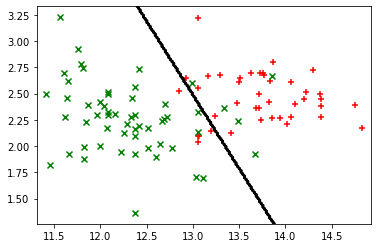

In [9]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

def predict(theta, X):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return (sigmoid(theta, X) >= 0.5).astype(int)

def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)
    plt.contour(xs, ys, zs, colors='black')
  
plot_boundary(Xtrain, lambda x: predict(W, x))
plot_points(Xtrain, ytrain)

- Using sklearn.metrics, compute the confusion matrix

In [10]:
import sklearn.metrics as metrics

y_pred=predict(W,Xtest)
y_pred_train=predict(W,Xtrain)

y_true =ytest
y=ytest

y_true_train=ytrain
# # y_pred = sigmoid(W, np.insert(X, 0, np.ones(len(X)), axis=1))
# # y_pred[y_pred>=0.5]=1
# # y_pred[y_pred<0.5]=0

# y_true =y

print(metrics.confusion_matrix(y_true, y_pred))
print(metrics.confusion_matrix(y_true_train, y_pred_train))


[[18  0]
 [ 0 15]]
[[36  5]
 [ 5 51]]


- Compute all performance metrics that has been defined during the lecture

In [11]:
mcm = metrics.confusion_matrix(y_true, y_pred)
tp = mcm[ 0, 0]
fp = mcm[ 0, 1]
tn = mcm[ 1, 1]
fn = mcm[ 1, 0]
p  = tp + fn
n  = tn + fp


In [12]:
# Accuracy 

# ( TP + TN)
# -------------------
#  Total cases

metrics.accuracy_score(y_true, y_pred) # or (tp+tn)/(p+n)

1.0

In [13]:
# True Positive Rate, Recall, Sensitivity

#  True Positive ( TP )
# -------------------
#      Positive P
            
recall= tp / p
recall

1.0

In [14]:
#False Alarm Rate, False Positive Rate

#  False Positive ( FP )
# -------------------
#      Negative N
            
FAR= fp / n
FAR

0.0

In [15]:
#Missed Detection Rate or False NegativeRate ( FNR )

#  False Negative ( FN )
# -------------------
#      Positive P

## Or MISS = FNR = 1 - recall

FNR = fn / p
FNR

0.0

In [16]:
# Specificity or True Negative Rate ( TNR )

# True Negative ( TN )
# -------------------
#      Negative N

## Or Specificity or TNR = 1 - recall

TNR = tn / n
TNR

1.0

In [17]:
# Precision = True Positive ( TP ) 
#             --------------------   = 1 − FDR  
#                    TP + FP       


# FDR =1 - Precision

precision = tp /(tp +fp)
FDR = fp / (tp+fp)

precision,FDR

(1.0, 0.0)

In [18]:
#Positive predictive value

PPV = tp / (tp +fp)
PPV

1.0

In [19]:




#Negative predictive value

NPV = tn / (tn +fn)
NPV

1.0

In [20]:
#F−Score =Precision × Recall

F_Score =precision*recall

F1_Score =metrics.f1_score(y_true, y_pred)

F_Score_beta =metrics.fbeta_score(y_true, y_pred,beta=0.30)

F_Score,F1_Score,F_Score_beta

(1.0, 1.0, 1.0)

- Plot the ROC curve of your classifier

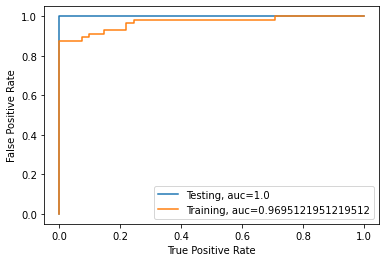

In [40]:
import matplotlib.pyplot as plt

def score(theta, X):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return sigmoid(theta, X) ## no need to use the one with 0.5, 

y_pred=score(W, Xtest)
y_pred_train=score(W, Xtrain)
fpr, tpr, _=metrics.roc_curve(y_true, y_pred,pos_label=1)
fpr1, tpr1, _=metrics.roc_curve(y_true_train, y_pred_train,pos_label=1)
auc = metrics.roc_auc_score(y, y_pred)
auc_t = metrics.roc_auc_score(y_true_train, y_pred_train)

plt.plot(fpr,tpr,label="Testing, auc="+str(auc))
plt.plot(fpr1,tpr1,label="Training, auc="+str(auc_t))
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

- Plot the Precision-Recall curve of your classifier

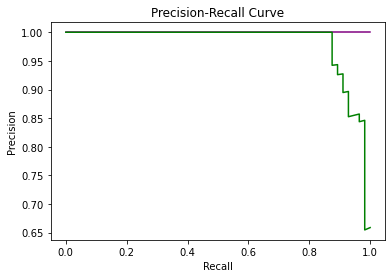

In [42]:
#calculate precision and recall
precision, recall, thresholds = metrics.precision_recall_curve(y, y_pred,pos_label=1)
precision_tr, recall_tr, thresholds = metrics.precision_recall_curve(y_true_train, y_pred_train,pos_label=1)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.plot(recall_tr, precision_tr, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

- How can we obtain a quadratic boundary? check it and plot the boundary?

In [109]:
from sklearn.preprocessing import PolynomialFeatures

def transform(x):
    return PolynomialFeatures(2).fit_transform(x)
#     dimension=x.shape[0]# #     ones=np.ones((dimension,1))
#     poly=np.hstack(( x,
#                     (x[:,0]**2).reshape(dimension,1),
#                     (x[:,0] * x[:,1] ).reshape(dimension,1),
#                     (x[:,1]**2).reshape(dimension,1)))
#     return poly
  
W= train(transform(Xtrain), ytrain)
print(W)
plot_points(Xtrain, ytrain)
plot_boundary(Xtrain, lambda x: predict(W, transform(x)))

TypeError: train() missing 1 required positional argument: 'lamb'

- Compute all performance metrics of this new classifier

In [74]:
Xtest_Qd=transform(Xtest)
y_pred=predict(W,Xtest_Qd)

y_true =ytest
y=ytest

mcm = metrics.confusion_matrix(y_true, y_pred)
tp = mcm[ 0, 0]
fp = mcm[ 0, 1]
tn = mcm[ 1, 1]
fn = mcm[ 1, 0]
p  = tp + fn
n  = tn + fp
mcm

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [75]:
# Accuracy 

# ( TP + TN)
# -------------------
#  Total cases

metrics.accuracy_score(y_true, y_pred) # or (tp+tn)/(p+n)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [76]:
# True Positive Rate, Recall, Sensitivity

#  True Positive ( TP )
# -------------------
#      Positive P
            
recall= tp / p
recall

1.0

In [77]:
#False Alarm Rate, False Positive Rate

#  False Positive ( FP )
# -------------------
#      Negative N
            
FAR= fp / n
FAR

0.0625

In [78]:
#Missed Detection Rate or False NegativeRate ( FNR )

#  False Negative ( FN )
# -------------------
#      Positive P

## Or MISS = FNR = 1 - recall

FNR = fn / p
FNR

0.0

In [79]:
# Specificity or True Negative Rate ( TNR )

# True Negative ( TN )
# -------------------
#      Negative N

## Or Specificity or TNR = 1 - recall

TNR = tn / n
TNR

0.9375

In [80]:
# Precision = True Positive ( TP ) 
#             --------------------   = 1 − FDR  
#                    TP + FP       


# FDR =1 - Precision

precision = tp /(tp +fp)
FDR = fp / (tp+fp)

precision,FDR

(0.9444444444444444, 0.05555555555555555)

In [81]:
#Positive predictive value

PPV = tp / (tp +fp)
PPV

0.9444444444444444

In [82]:
#Negative predictive value

NPV = tn / (tn +fn)
NPV

1.0

In [83]:
#F−Score =Precision × Recall

F_Score =precision*recall

F1_Score =metrics.f1_score(y_true, y_pred)

F_Score_beta =metrics.fbeta_score(y_true, y_pred,beta=0.30)

F_Score,F1_Score,F_Score_beta

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

- Plot the ROC curve of your classifier

In [84]:
import matplotlib.pyplot as plt


fpr, tpr, _=metrics.roc_curve(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

ValueError: multiclass format is not supported

- Plot the Precision-Recall curve of your classifier

In [85]:
#calculate precision and recall
precision, recall, thresholds = metrics.precision_recall_curve(y, y_pred,pos_label=1)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

ValueError: y should be a 1d array, got an array of shape (45, 3) instead.

# Multinomial Logistic Regression

The next step is something more interesting: we use a similar set of two features from the data set (this time alcohol and flavanoids), but with all three labels instead of two.

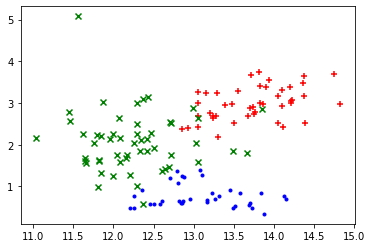

In [86]:
X = data[['alcohol', 
          'flavanoids']].to_numpy()
y = data[['class']].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
ytrain = label_binarize(ytrain, classes = [1, 2, 3])
plot_points(Xtrain, ytrain.argmax(axis=1))

In [87]:
print(ytrain)

[[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 

The plotted data points again suggest some obvious linear boundaries between the three classes.

We can solve this problem as three one-vs-all problems, and re-use all the previous code. In this part, we will try another solution inspired from softmax function known as softmax regression (See C.Bishop, "Pattern Recognition and Machine Learning", 2006, Springer).

$$
SoftMax_\Theta(x, k) = \frac{e^{\theta_k^Tx}}{\sum\limits_{c=1}^K e^{\theta_c^Tx}}
$$

The cost function is defined as follows:

$$
J(\Theta) =-\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^3\left[y_k^{i}\log\left(SoftMax_\Theta\left(x^{i}, k\right)\right)\right]
$$

- Propose a solution using the SoftMax function and test it with linear and quadratic separator? 

In [98]:
def softmax(w, x):
    w = w.reshape((x.shape[1], -1)) # -1 should be the number of classes
    t = np.exp(x @ w)
    return t / np.sum(t, axis=1, keepdims=True)

def cost(w, x, y):
    N = len(x)
    fx = softmax(w, x)
    return -np.sum(y * np.log(fx)) / N

def grad(w, x, y):
    yhat = softmax(w, x)
    error = yhat - y
    return x.T @ error / x.shape[0]

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros((X.shape[1], y.shape[1]))
    result = fmin_tnc(func = cost, x0 = theta, fprime = grad, args=(X, y))
    print(result)
    return result[0].reshape((X.shape[1], -1))

W1= train(Xtrain, ytrain)
print(W1)
W2 = train(transform(Xtrain), ytrain)
#print(W2)

(array([-25.56482313,  39.54285556, -24.02920946,   1.6978479 ,
        -2.86895845,   2.95276031,   3.79697333,   1.61741354,
        -6.73262974]), 100, 3)
[[-25.56482313  39.54285556 -24.02920946]
 [  1.6978479   -2.86895845   2.95276031]
 [  3.79697333   1.61741354  -6.73262974]]
(array([-8.84409053e-04,  1.24919062e-01, -1.24693136e-01, -8.84409053e-04,
        1.24919062e-01, -1.24693136e-01,  6.89140948e-02,  4.71206360e-01,
       -8.36264745e-01,  1.78314492e-02,  6.53667892e-02, -8.67374661e-02,
       -1.86545783e-02,  9.16537034e-02, -1.82195541e-01,  1.23549967e-01,
       -8.06877162e-02, -3.02905151e-01, -3.56839659e-02,  1.14280333e-01,
       -9.62316163e-02, -4.55268010e-04,  4.45863343e-04, -1.94623099e-04,
       -2.63027035e-03,  6.20733953e-03,  2.66389444e-02, -9.62742943e-03,
        4.68392015e-02, -3.56115868e-01, -9.29814294e-02,  1.50369923e-01,
       -1.22279258e-01, -4.22076554e-04, -5.70083568e-04,  1.79698536e-03,
        3.25890688e-03, -1.85138025e-03

  NIT   NF   F                       GTG
    0    1  1.098612288668110E+00   1.32143671E+00
tnc: stepmx = 1000
    1    6  6.480864268141704E-01   4.52919421E-01
    2   11  3.936772912426083E-01   9.24773274E-01
    3   16  3.433830026684229E-01   1.00824076E-01
    4   20  3.387194246910305E-01   3.28841616E-03
    5   25  3.190036351939377E-01   2.02836091E-03
tnc: fscale = 22.2038
    6   28  3.187174023121067E-01   2.76214913E-03
    7   36  2.913168276692567E-01   6.67597106E-03
    8   45  2.660204377468317E-01   3.49941873E-02
    9   50  2.093562937400823E-01   3.39702141E-03
   10   53  2.024738402119083E-01   1.87334503E-03
   11   58  2.017668094819615E-01   1.13780910E-05
   12   63  2.017015297934894E-01   1.72145462E-06
tnc: fscale = 762.171
   13   68  2.013253933123372E-01   5.31323862E-05
   14   73  2.002373850459630E-01   5.76947186E-05
   15   78  1.999910841471965E-01   1.03277819E-06
   16   81  1.999892123190674E-01   3.26080838E-08
   17   86  1.999888559309056

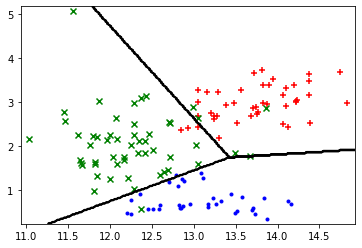

In [99]:
def predict_multi(x, w):
    X = np.insert(x, 0, np.ones(len(x)), axis=1)
    return np.argmax(softmax(w,X),axis=1)

plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: predict_multi(x, W1))


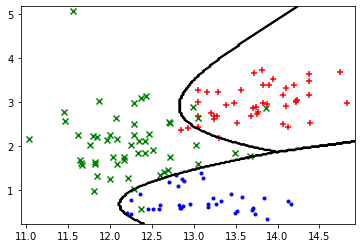

In [100]:
plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x:  predict_multi(transform(x), W2))

- Compute the accuracy, the precision and the recall of these classifiers

In [96]:
y_pred=predict_multi(transform(Xtest),W_qua)
y_true =ytest.flatten()
y=ytest.flatten()

mcm = metrics.confusion_matrix(y_true, y_pred)[1:,[0,1,2]]
tp = mcm[ 0, 0]
fp = mcm[ 0, 1]
tn = mcm[ 1, 1]
fn = mcm[ 1, 0]
p  = tp + fn
# n  = tn + fp
mcm

array([[15,  0,  0],
       [18,  0,  0],
       [12,  0,  0]])

In [2969]:
# Accuracy 

# ( TP + TN)
# -------------------
#  Total cases

accuracy_score=metrics.accuracy_score(y_true, y_pred) # or (tp+tn)/(p+n)
print("Acc:" ,accuracy_score)

precision_score= metrics.precision_score(y_true, y_pred,average='micro')

print("precision_score:" ,precision_score)

Acc: 0.022222222222222223
precision_score: 0.022222222222222223


In [2958]:
# True Positive Rate, Recall, Sensitivity

#  True Positive ( TP )
# -------------------
#      Positive P
            
recall= tp / p
recall

0.0

In [ ]:
#F−Score =Precision × Recall

F_Score =precision*recall

F1_Score =metrics.f1_score(y_true, y_pred)

F_Score_beta =metrics.fbeta_score(y_true, y_pred,beta=0.30)

F_Score,F1_Score,F_Score_beta

- Plot the ROC curve of your classifier

In [ ]:
import matplotlib.pyplot as plt


fpr, tpr, _=metrics.roc_curve(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

- Plot the Precision-Recall curve of your classifier

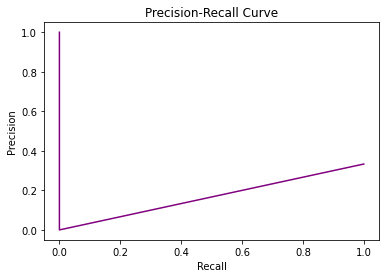

In [2972]:
#calculate precision and recall
precision, recall, thresholds = metrics.precision_recall_curve(y, y_pred,pos_label=1)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

- Conclude?

# Regularization

Next, we want to include all the features from the data set.

In [ ]:
X = data.drop('class', 1).as_matrix()
y = data.as_matrix(columns=['class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
ytrain = label_binarize(ytrain, classes = [1, 2, 3])

Because we are now significantly increasing the number of features, we apply regularisation  as part of new cost and gradient functions.  As we have seen with linear regression, regularization prevents overfitting, a situation where a large number of features allows the classifier to fit the training set *too* exactly, meaning that it fails to generalize well and perform accurately on data it hasn't yet seen.

To avoid this problem, we add an additional term to the cost function

$$
J(\Theta) =-\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^3\left[y_k^{i}\log\left(SoftMax_\Theta\left(x^{i}, k\right)\right)\right] + \frac{\lambda}{2}\left(\left\|\theta_1\right\|_2^2+\left\|\theta_2\right\|_2^2+\left\|\theta_3\right\|_2^2\right)
$$

- Compute the partiel derivatives of $J(\theta)$ and define the update formula of the gradient descent algorithm?

- Write a function that minimize $J(\theta)$ and test it on the WINE dataset?

In [120]:
def softmax(w, x):
    w = w.reshape((x.shape[1], -1)) # -1 should be the number of classes
    t = np.exp(x @ w)
    return t / np.sum(t, axis=1, keepdims=True)

def cost(w, x, y,lamb):
    N = len(x)
    fx = softmax(w, x)
    return -np.sum(y * np.log(fx)) / N + lamb / 2* np.sum(w**2)

def grad(w, x, y,lamb):
    w = w.reshape((x.shape[1], -1))
    yhat = softmax(w, x)
    error = yhat - y
    return x.T @ error / x.shape[0] + lamb* w # since W is a matruix

def train(X, y,lamb):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros((X.shape[1], y.shape[1]))
    result = fmin_tnc(func = cost, x0 = theta, fprime = grad, args=(X, y,lamb))
    print(result)
    return result[0].reshape((X.shape[1], -1))

W1= train(Xtrain, ytrain,0.5)
print(W1)
W2 = train(transform(Xtrain), ytrain,0.5)
#print(W2)

(array([-0.04081411,  0.04382352, -0.00300922, -0.0467684 , -0.00358919,
        0.05035801,  0.35372441,  0.09080843, -0.44453273]), 18, 1)
[[-0.04081411  0.04382352 -0.00300922]
 [-0.0467684  -0.00358919  0.05035801]
 [ 0.35372441  0.09080843 -0.44453273]]
(array([-0.04193562,  0.04924855, -0.00731305, -0.04193562,  0.04924855,
       -0.00731305, -0.26961598,  0.31395881, -0.04434208, -0.04106207,
        0.0656636 , -0.02460163, -0.00882447, -0.02567204,  0.03449525,
        0.22312683,  0.0338917 , -0.25701757, -0.05282956,  0.10946884,
       -0.05663826]), 87, 1)


  NIT   NF   F                       GTG
    0    1  1.098612288668110E+00   1.32143671E+00
    1    5  9.628408466287183E-01   9.02521504E-02
    2    8  9.617724155115333E-01   9.90599444E-04
tnc: fscale = 31.7725
    3   13  9.615055637852430E-01   1.81449661E-07
tnc: fscale = 2347.59
tnc: |fn-fn-1] = 1.20074e-08 -> convergence
    4   18  9.615055517778387E-01   7.55133528E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.098612288668110E+00   2.17257398E+02
    1    5  7.273080636571595E-01   9.67249730E+02
tnc: fscale = 0.0321537
    2    8  6.690376354267600E-01   6.70204172E+01
    3   16  5.209138834690553E-01   8.26181404E+01
    4   23  4.832813903702423E-01   1.10030751E+00
tnc: fscale = 0.953329
    5   29  4.817201493116142E-01   3.80482360E-03
    6   38  4.815140834766350E-01   1.69683459E-03
tnc: fscale = 24.2762
    7   44  4.814820538912111E-01   1.74311371E-05
    8   51  4.814787238961915E-01   5.19571497E-05
    9   56 

- Compare with non regularized version?

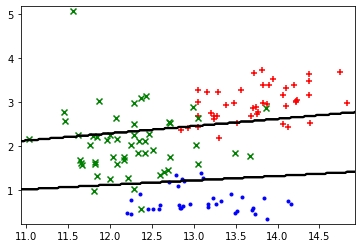

In [121]:
def predict_multi(x, w):
    X = np.insert(x, 0, np.ones(len(x)), axis=1)
    return np.argmax(softmax(w,X),axis=1)

plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: predict_multi(x, W1))

- Conclude?

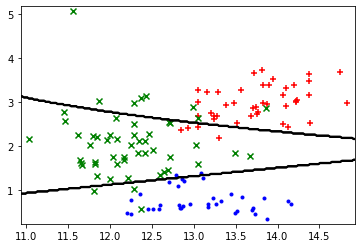

In [122]:


plot_points(Xtrain, ytrain.argmax(axis=1))
plot_boundary(Xtrain, lambda x: predict_multi(transform(x), W2))